# Maze Experiment Introduction

In this notebook, we will be running the MDP_Model on the Maze problem. This 2D simulation builds on a `gym-maze` package that can be found here: https://github.com/MattChanTK/gym-maze. Before beginning this simulation, please be sure to install the relevant packages on the github **Installation** section (pygame and numpy are also required)!

## Running the Algorithm - Optimal Clustering 5x5

We can generate bigger mazes using the same method as above! Then, we will test to see if the optimal policy found by the maze is the same as the real optimal policy. 

#### Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import gym
import gym_maze

import sys
sys.path.append('/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/')

from model import MDP_model
from maze_functions import createSamples, opt_maze_trajectory, opt_model_trajectory, policy_accuracy, \
    get_maze_transition_reward, plot_paths, value_diff, get_maze_MDP
from MDPtools import SolveMDP
from testing import cluster_size, next_clusters, training_value_error, purity, plot_features, testing_value_error

mazes = {1: 'maze-v0',
         2: 'maze-sample-3x3-v0',
         3: 'maze-random-3x3-v0',
         4: 'maze-sample-5x5-v0',
         5: 'maze-random-5x5-v0',
         6: 'maze-sample-10x10-v0',
         7: 'maze-random-10x10-v0',
         8: 'maze-sample-100x100-v0',
         9: 'maze-random-100x100-v0',
         10: 'maze-random-10x10-plus-v0', # has portals 
         11: 'maze-random-20x20-plus-v0', # has portals 
         12: 'maze-random-30x30-plus-v0'} # has portals 

#### Creating Samples

In [2]:
# Setting Parameters
N = 200
T_max = 25
r = 0.4
maze = mazes[4]

In [3]:
#df = createSamples(N, T_max, maze, r, reseed=True)

# UPDATE with path and filename for dataset you want to use!
path = '/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids_Dropbox/Maze/fitted_Q Comparisons/Datasets/Test 1 (N=200, T_max = 25, randomness=0.4)'
sys.path.append(path)
filename = 'set_4.csv'
df = pd.read_csv(path+'/'+filename)

# taking out extra ID col and changing actions back to integers
df = df.iloc[:, 1:]
df.loc[df['ACTION']=='None', 'ACTION'] = 4
df['ACTION'] = pd.to_numeric(df['ACTION'], downcast='integer')
df.loc[df['ACTION']==4, 'ACTION'] = 'None'

df

,ID,TIME,FEATURE_0,FEATURE_1,ACTION,RISK,OG_CLUSTER
0,0,0,0.917504,-0.359175,2,-0.004,0
1,0,1,1.469175,-0.730709,2,-0.004,1
2,0,2,2.663953,-0.227007,1,-0.004,2
3,0,3,2.141935,-1.350262,1,-0.004,7
4,0,4,2.644228,-2.347577,0,-0.004,12
...,...,...,...,...,...,...,...
4568,199,14,3.757846,-1.040545,2,-0.004,8
4569,199,15,4.219758,-1.602285,1,-0.004,9
4570,199,16,4.444872,-2.464416,1,-0.004,14
4571,199,17,4.219659,-3.406585,1,-0.004,19


That's how the transition data looks like:

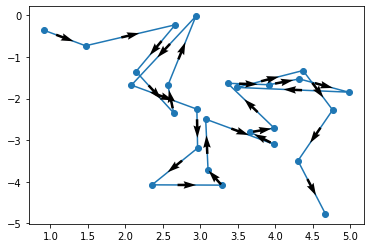

In [4]:
plot_paths(df,1)

Checking how many points actually reach the end: 

In [5]:
df.loc[df['ACTION']=='None']['ID'].count()

129

#### Fitting to Algorithm

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]

Clusters Initialized
     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0     0     0   0.917504  -0.359175      2 -0.004           0        0   
1     0     1   1.469175  -0.730709      2 -0.004           1        0   
2     0     2   2.663953  -0.227007      1 -0.004           2        0   
3     0     3   2.141935  -1.350262      1 -0.004           7        0   
4     0     4   2.644228  -2.347577      0 -0.004          12        0   
..   ..   ...        ...        ...    ...    ...         ...      ...   
226   9    18   4.881530  -2.888142      1 -0.004          14        0   
227   9    19   4.515281  -3.187259      0 -0.004          19        0   
228   9    20   4.994324  -2.549241      1 -0.004          14        0   
229   9    21   4.440553  -3.575720      1 -0.004          19        0   
230   9    22   4.064881  -4.855516   None  1.000          24        1   

    NEXT_CLUSTER  
0              0  
1              0  
2              0  
3             

Splitting... |#Clusters:3:   4%|▍         | 1/23 [00:00<00:07,  2.81it/s]

threshold 10.132456102380443 max_inc 8.000000000000002
new opt_k 3


Splitting... |#Clusters:4:   9%|▊         | 2/23 [00:00<00:07,  2.98it/s]

threshold 7.599342076785332 max_inc 8.0


Splitting... |#Clusters:5:  13%|█▎        | 3/23 [00:00<00:06,  3.12it/s]

threshold 6.079473661428265 max_inc 10.999999999999996


Splitting... |#Clusters:6:  17%|█▋        | 4/23 [00:01<00:06,  3.06it/s]

threshold 5.066228051190222 max_inc 8.000000000000002


Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:01<00:05,  3.22it/s]

threshold 4.342481186734475 max_inc 12.999999999999998


Splitting... |#Clusters:8:  26%|██▌       | 6/23 [00:01<00:05,  3.27it/s]

threshold 3.799671038392666 max_inc 12.000000000000002


Splitting... |#Clusters:9:  30%|███       | 7/23 [00:02<00:05,  3.13it/s]

threshold 3.3774853674601477 max_inc 11.0


Splitting... |#Clusters:10:  35%|███▍      | 8/23 [00:02<00:04,  3.04it/s]

threshold 3.0397368307141326 max_inc 11.999999999999996


Splitting... |#Clusters:11:  39%|███▉      | 9/23 [00:02<00:04,  2.96it/s]

threshold 2.76339711883103 max_inc 10.999999999999998


Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:03<00:04,  2.72it/s]

threshold 2.533114025595111 max_inc 13.0


Splitting... |#Clusters:13:  48%|████▊     | 11/23 [00:03<00:04,  2.60it/s]

threshold 2.3382591005493327 max_inc 5.0


Splitting... |#Clusters:14:  52%|█████▏    | 12/23 [00:04<00:04,  2.48it/s]

threshold 2.1712405933672376 max_inc 13.000000000000002


Splitting... |#Clusters:15:  57%|█████▋    | 13/23 [00:04<00:04,  2.36it/s]

threshold 2.0264912204760885 max_inc 5.0


Splitting... |#Clusters:16:  61%|██████    | 14/23 [00:05<00:04,  2.22it/s]

threshold 1.899835519196333 max_inc 3.0


Splitting... |#Clusters:17:  65%|██████▌   | 15/23 [00:05<00:03,  2.10it/s]

threshold 1.7880804886553723 max_inc 3.0000000000000004


Splitting... |#Clusters:18:  70%|██████▉   | 16/23 [00:06<00:03,  2.03it/s]

threshold 1.6887426837300739 max_inc 4.0


Splitting... |#Clusters:19:  74%|███████▍  | 17/23 [00:06<00:03,  1.86it/s]

threshold 1.5998614898495436 max_inc 4.0


Splitting... |#Clusters:20:  78%|███████▊  | 18/23 [00:07<00:02,  1.82it/s]

threshold 1.5198684153570663 max_inc 5.0


Splitting... |#Clusters:21:  83%|████████▎ | 19/23 [00:08<00:02,  1.84it/s]

threshold 1.4474937289114918 max_inc 4.0


Splitting... |#Clusters:22:  87%|████████▋ | 20/23 [00:08<00:01,  1.81it/s]

threshold 1.381698559415515 max_inc 5.0


Splitting... |#Clusters:23:  91%|█████████▏| 21/23 [00:09<00:01,  1.78it/s]

threshold 1.3216247090061446 max_inc 4.0


Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:09<00:00,  1.66it/s]

threshold 1.2665570127975554 max_inc 7.000000000000001


Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:10<00:00,  2.10it/s]

threshold 1.215894732285653 max_inc 4.0
Optimal # of clusters reached


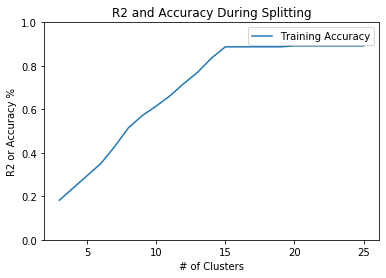

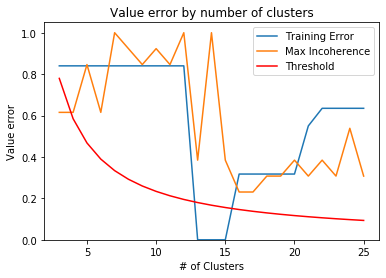

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]

N= 10  completed
Clusters Initialized
     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  CLUSTER  \
0     0     0   0.917504  -0.359175      2 -0.004           0        0   
1     0     1   1.469175  -0.730709      2 -0.004           1        0   
2     0     2   2.663953  -0.227007      1 -0.004           2        0   
3     0     3   2.141935  -1.350262      1 -0.004           7        0   
4     0     4   2.644228  -2.347577      0 -0.004          12        0   
..   ..   ...        ...        ...    ...    ...         ...      ...   
449  19    16   3.939028  -1.895875      2 -0.004           8        0   
450  19    17   4.155241  -1.670404      1 -0.004           9        0   
451  19    18   4.580430  -2.045098      1 -0.004          14        0   
452  19    19   4.196528  -3.134922      1 -0.004          19        0   
453  19    20   4.995242  -4.934154   None  1.000          24        1   

    NEXT_CLUSTER  
0              0  
1              0  
2              0

Splitting... |#Clusters:3:   4%|▍         | 1/23 [00:00<00:08,  2.50it/s]

threshold 14.204850501775011 max_inc 17.99999999999999


Splitting... |#Clusters:4:   9%|▊         | 2/23 [00:00<00:08,  2.45it/s]

threshold 10.653637876331258 max_inc 18.000000000000004


Splitting... |#Clusters:5:  13%|█▎        | 3/23 [00:01<00:08,  2.35it/s]

threshold 8.522910301065007 max_inc 25.999999999999996


Splitting... |#Clusters:6:  17%|█▋        | 4/23 [00:01<00:08,  2.19it/s]

threshold 7.102425250887506 max_inc 21.999999999999993


Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:02<00:08,  2.07it/s]

threshold 6.0877930721892906 max_inc 26.000000000000007


Splitting... |#Clusters:8:  26%|██▌       | 6/23 [00:02<00:08,  1.92it/s]

threshold 5.326818938165629 max_inc 24.000000000000004


Splitting... |#Clusters:9:  30%|███       | 7/23 [00:03<00:08,  1.80it/s]

threshold 4.7349501672583365 max_inc 23.000000000000007


Splitting... |#Clusters:10:  35%|███▍      | 8/23 [00:04<00:08,  1.74it/s]

threshold 4.261455150532504 max_inc 24.999999999999993


Splitting... |#Clusters:11:  39%|███▉      | 9/23 [00:04<00:08,  1.64it/s]

threshold 3.87405013684773 max_inc 23.0


Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:05<00:08,  1.54it/s]

threshold 3.551212625443753 max_inc 22.0


Splitting... |#Clusters:13:  48%|████▊     | 11/23 [00:06<00:08,  1.45it/s]

threshold 3.278042423486541 max_inc 6.0


Splitting... |#Clusters:14:  52%|█████▏    | 12/23 [00:07<00:08,  1.36it/s]

threshold 3.0438965360946453 max_inc 7.000000000000001


Splitting... |#Clusters:15:  57%|█████▋    | 13/23 [00:08<00:07,  1.30it/s]

threshold 2.840970100355002 max_inc 6.0


Splitting... |#Clusters:16:  61%|██████    | 14/23 [00:09<00:07,  1.25it/s]

threshold 2.6634094690828145 max_inc 6.0


Splitting... |#Clusters:17:  65%|██████▌   | 15/23 [00:09<00:06,  1.23it/s]

threshold 2.506738323842649 max_inc 6.0


Splitting... |#Clusters:18:  70%|██████▉   | 16/23 [00:10<00:05,  1.22it/s]

threshold 2.3674750836291683 max_inc 6.0


Splitting... |#Clusters:19:  74%|███████▍  | 17/23 [00:11<00:04,  1.21it/s]

threshold 2.242871131859212 max_inc 11.0


Splitting... |#Clusters:20:  78%|███████▊  | 18/23 [00:12<00:04,  1.20it/s]

threshold 2.130727575266252 max_inc 12.0


Splitting... |#Clusters:21:  83%|████████▎ | 19/23 [00:13<00:03,  1.20it/s]

threshold 2.02926435739643 max_inc 9.0


Splitting... |#Clusters:22:  87%|████████▋ | 20/23 [00:14<00:02,  1.18it/s]

threshold 1.937025068423865 max_inc 8.0


Splitting... |#Clusters:23:  91%|█████████▏| 21/23 [00:15<00:01,  1.12it/s]

threshold 1.8528065871880448 max_inc 10.0


Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:16<00:00,  1.10it/s]

threshold 1.7756063127218764 max_inc 13.0


Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:17<00:00,  1.29it/s]

threshold 1.7045820602130013 max_inc 8.0
Optimal # of clusters reached


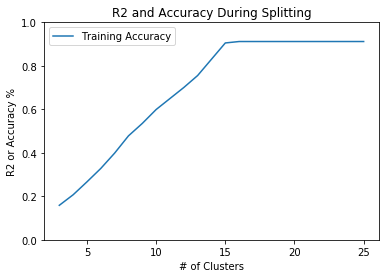

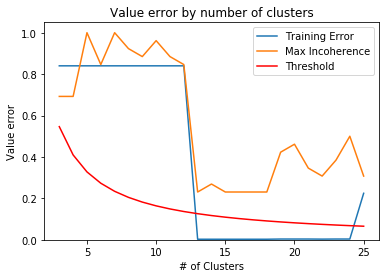

N= 20  completed


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [10]:
# Setting parameters for model fitting
max_k = 25
classification = 'DecisionTreeClassifier'
split_classifier_params = {'random_state':0, 'max_depth':2}
clustering = 'Agglomerative'
n_clusters = None
distance_threshold = 0.5
random_state = 0
pfeatures = 2
gamma = 1
actions = [0, 1, 2, 3]
h = -1
cv = 5
th = 0
eta = 6

#Ns = [10, 20, 30, 40, 50, 70, 90, 110, 130, 150, 170, 200]
Ns = [10, 20]
df_full = df.copy()

models=[]
    
# Training models and fitted Q! 
for n in Ns:
    df_small = df_full.loc[df_full['ID']<n]
    
    m = MDP_model()
    m.fit(df_small, # df: dataframe in the format ['ID', 'TIME', ...features..., 'RISK', 'ACTION']
        pfeatures, # int: number of features
        h, # int: time horizon (# of actions we want to optimize)
        gamma, # discount factor
        max_k, # int: number of iterations
        distance_threshold, # clustering diameter for Agglomerative clustering
        cv, # number for cross validation
        th, # splitting threshold
        eta, # incoherence threshold
        classification, # classification method
        split_classifier_params, # classification params
        clustering,# clustering method from Agglomerative, KMeans, and Birch
        n_clusters, # number of clusters for KMeans
        random_state,
        plot=True,
        optimize=True)
    print('N=', n, ' completed')
    models.append(m)

In [12]:
models[1].opt_k

13

## Errors

In [ ]:
# Creating a test set with same parameters as training set
df_test = createSamples(N, T_max, maze, r, reseed=True)

# In & out sample training and testing value errors: 
training_errors = []
testing_errors = []
for m in models: 
    tr_err = m.training_error.loc[m.training_error['Clusters']==m.opt_k]['Error'].min()
    te_err = testing_value_error(df_test, m.df_trained, m.m, m.pfeatures, gamma, relative=False, h=-1)
    training_errors.append(tr_err)
    testing_errors.append(te_err)

fig1, ax1 = plt.subplots()
ax1.plot(Ns, training_errors, label='Training Error')
ax1.plot(Ns, testing_errors, label='Testing Error')
ax1.set_title('Testing and Training Errors by N')
ax1.set_xlabel('N training data size')
ax1.set_ylabel('Error')
ax1.legend()

In [ ]:
models[-2].training_error

Here is a metric that measures how good our classification model is in putting points in the right cluster:

In [ ]:
m.clus_pred_accuracy

Going through each point in the training data set, here is how many (by percentage) our optimal policy actually returned the correct action for. This is essentially the training accuracy:

In [ ]:
# in sample policy accuracy (comparing model suggestion to true optimal)
policy_accuracy(m, maze, m.df_trained)

In [ ]:
# out of sample policy accuracy (comparing model suggestion to true optimal)
policy_accuracy(m, maze, df_test)

## Accuracies

Make graphs putting training & testing together; testing dataset random each time. 

In [ ]:
# Generalization Accuracies (training & testing)
from testing import generalization_accuracy

tr_acc, test_acc = generalization_accuracy(models, df_test, Ns)

## Optimality Gap

In [ ]:
# Set Parameters
P, R = get_maze_MDP(maze)
K = 100
f, rw = get_maze_transition_reward(maze)

opt_gap = value_diff(models, Ns, K, T_max, P, R, f, rw)
fig1, ax1 = plt.subplots()
ax1.plot(Ns, opt_gap)
ax1.set_title('Optimality Gap by Data Size N')
ax1.set_xlabel('N training data size')
ax1.set_ylabel('|V_alg-V*|')

In [ ]:
opt_gap

#### Observing Policies

First, let's see what the clustering that the model found actually looks like!

In [ ]:
inc = []
ks = []
sizes =[]
for model in models:
    inc_model = model.incoherences
    #print(inc_model)
    inc.append(inc_model['Incoherences'].min())
    #ks.append(inc_model['Incoherences'].argmin()+2)
    ks.append(model.opt_k)
    sizes.append(model.df_trained.shape[0])
print(ks)

In [ ]:
plt.plot(Ns, inc)
plt.plot(Ns, 6*np.sqrt(np.array(sizes))/np.array(ks))

In [ ]:
m.opt_model_trajectory((0.5, -0.5), f)

In [ ]:
plot_features(models[2].df_trained, 'FEATURE_0', 'FEATURE_1', 'CLUSTER')

And compare it with a clustering with the actual cells of the Maze.

In [ ]:
plot_features(m.df_trained, 'FEATURE_0', 'FEATURE_1', 'OG_CLUSTER')

In [ ]:
def plot_features(df, x, y, c='CLUSTER'):
    df.plot.scatter(x=x,
                      y=y,
                      c=c,
                      colormap='tab20')
#    import seaborn as sns
#    sns.pairplot(x_vars=["FEATURE_1"], y_vars=["FEATURE_2"], data=df, hue="OG_CLUSTER", height=5)
    plt.show()

Now, let's see what the optimal policy our model learns is:

In [ ]:
opt_model_trajectory(models[-1], maze, alpha=0.2)

And here is an actual simulation of a point through the maze by taking the found optimal policy. Note that we have set a sink node as the bottom left corner, which is where the path will go once it has reached the goal state.

In [ ]:
m.nc.loc[13]

In [ ]:
models[-1].solve_MDP(beta=0.6)

In [ ]:
f, rw = get_maze_transition_reward(maze)
x0= np.random.rand(2)
m.opt_model_trajectory(x0, f)

And finally, here is the optimal policy for reference:

In [ ]:
opt_maze_trajectory(maze)

## Saving Relevant Models

In [ ]:
# import pickle
# rd = '10'
# for i in range(len(Ns)):
#     x = Ns[i]
#     pickle.dump(models[i], open(f'round_{rd}_model_N={x}.sav', 'wb'))

In [ ]:
m = pickle.load(open('round_6_model_N=90.sav', 'rb'))
m.incoherences['Error'] = m.training_error['Error']
m.incoherences